In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ToxinsbaseClass.csv')
dataset.shape

(137, 23)

In [3]:
dataset.head(5)

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
0,46.673750,6.322253,18.0,1.05,10.5,22.5,21.1,0.21,0.01,0.02,...,0.000,0.0,0.001,0.000,0.0,0.0,2,0.42,0.001,1
1,46.514161,6.773583,13.0,1.60,9.0,20.4,19.3,0.50,0.01,0.09,...,0.000,0.0,0.003,0.004,0.0,0.0,3,1.05,0.009,1
2,46.354617,6.152489,3.5,3.50,3.0,26.0,25.9,2.00,0.00,0.12,...,0.000,0.0,0.002,0.019,0.0,0.0,3,0.39,0.021,1
3,47.287447,8.211500,48.0,1.75,12.0,23.9,19.4,0.52,0.01,0.02,...,0.302,0.0,0.290,0.005,0.0,0.0,4,1.00,0.668,2
4,46.638953,6.286464,32.0,4.00,11.0,21.5,19.7,0.91,0.01,0.07,...,0.090,0.0,0.056,0.003,0.0,0.0,4,1.07,0.177,2


In [4]:
dataset.describe()

,Latitude,Longitude,MaximumDepth,SecchiDepth,Sampling Depth,T_Surf,T_Epi,Zeu / Zmix,BuoyFreq,TP,...,MC_dmRR,MC_RR,MC_dmLR,MC_LR,CYN,ATX,ToxinRichness,TDI,TTC,Toxicity
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,51.104677,14.813468,17.987591,1.486715,6.429927,22.183212,20.775912,0.987226,0.005693,0.088102,...,0.558226,0.205036,0.156095,0.199876,0.048482,0.028036,3.941606,0.780657,1.350766,1.832117
std,6.051893,10.720521,27.797015,1.258167,4.819238,3.102930,3.143774,1.117894,0.006159,0.109649,...,1.903642,0.507328,0.513956,0.574369,0.209486,0.124335,1.625922,0.394969,2.849080,0.800453
min,36.755550,-25.788917,1.000000,0.160000,0.700000,9.000000,8.700000,0.040000,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,47.350792,10.983188,4.500000,0.650000,3.000000,20.300000,18.900000,0.350000,0.000000,0.030000,...,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,3.000000,0.530000,0.033000,1.000000
50%,52.413611,16.698806,9.000000,1.050000,5.000000,22.000000,20.400000,0.550000,0.010000,0.060000,...,0.000000,0.000000,0.007000,0.017000,0.000000,0.000000,4.000000,0.880000,0.189000,2.000000
75%,54.591528,21.592222,23.000000,1.800000,9.000000,23.900000,22.300000,1.230000,0.010000,0.090000,...,0.086000,0.119000,0.047000,0.098000,0.004000,0.004000,5.000000,1.060000,0.901000,2.000000
max,62.239189,32.832500,251.000000,6.200000,30.000000,31.400000,31.200000,8.800000,0.030000,0.870000,...,14.892000,3.309000,3.166000,3.968000,2.007000,1.333000,7.000000,1.440000,17.189000,3.000000


In [5]:
X = dataset.iloc[: , 0:21].values
Y = dataset.iloc[: , 22].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train_lda = X_train.copy()
X_test_lda = X_test.copy()
Y_train_lda = Y_train.copy()
Y_test_lda = Y_test.copy()

In [7]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

X_train_lda = sc_X.fit_transform(X_train_lda)
X_test_lda = sc_X.fit_transform(X_test_lda)

In [8]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

In [10]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

X_train_lda = lda.fit(X_train_lda, Y_train_lda).transform(X_train_lda)
X_test_lda = lda.fit(X_test_lda, Y_test_lda).transform(X_test_lda)

In [11]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26828268, 0.14918599])

In [12]:
explained_variance_lda = lda.explained_variance_ratio_
explained_variance_lda

array([0.96010314, 0.03989686])

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
classifier = LogisticRegression(random_state=0)
classifier_lda = LogisticRegression(random_state=0)

In [15]:
classifier.fit(X_train, Y_train)
classifier_lda.fit(X_train_lda, Y_train_lda)

classifier.fit(X_test, Y_test)
classifier_lda.fit(X_test_lda, Y_test_lda)

LogisticRegression(random_state=0)

In [16]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 1, 1])

In [17]:
Y_pred_lda = classifier_lda.predict(X_test_lda)
Y_pred_lda

array([1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 2, 3, 1,
       3, 2, 2, 2, 1, 1])

In [18]:
from sklearn.metrics import confusion_matrix as cm
conf_matrix = cm(Y_test, Y_pred)
conf_matrix

array([[10,  2,  0],
       [ 2,  7,  1],
       [ 1,  1,  4]])

In [19]:
conf_matrix_lda = cm(Y_test_lda, Y_pred_lda)
conf_matrix_lda

array([[12,  0,  0],
       [ 1,  9,  0],
       [ 0,  0,  6]])

In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.75

In [21]:
accuracy_lda = accuracy_score(Y_test_lda, Y_pred_lda)
accuracy_lda

0.9642857142857143

In [22]:
Y_pred = classifier.predict(X_train)
Y_pred

array([2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 3, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1, 3, 2, 1,
       2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 2, 3, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1])

In [23]:
Y_pred_lda = classifier_lda.predict(X_train_lda)
Y_pred_lda

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1])

In [24]:
conf_matrix = cm(Y_train, Y_pred)
conf_matrix

array([[33, 11,  1],
       [19, 14,  3],
       [ 4,  9, 15]])

In [25]:
conf_matrix_lda = cm(Y_train_lda, Y_pred_lda)
conf_matrix_lda

array([[37,  8,  0],
       [ 2, 34,  0],
       [21,  7,  0]])

In [26]:
accuracy = accuracy_score(Y_train, Y_pred)
accuracy

0.5688073394495413

In [27]:
accuracy_lda = accuracy_score(Y_train_lda, Y_pred_lda)
accuracy_lda

0.6513761467889908

<ipython-input-28-79f7e73d5ab2>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


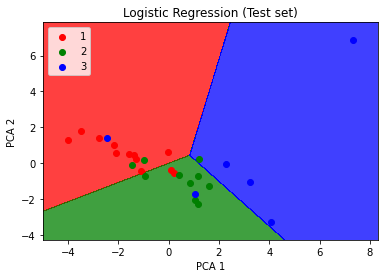

In [28]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Test set)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

<ipython-input-29-fb4cd6e78d6e>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


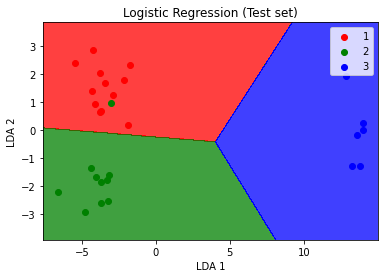

In [29]:
X_set, Y_set = X_test_lda, Y_test_lda
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Test set)")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.legend()
plt.show()

<ipython-input-30-cf8784b9bf05>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


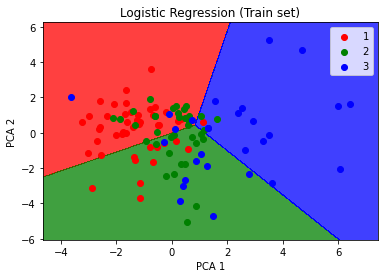

In [30]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Train set)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

<ipython-input-31-a14b3e26d087>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)


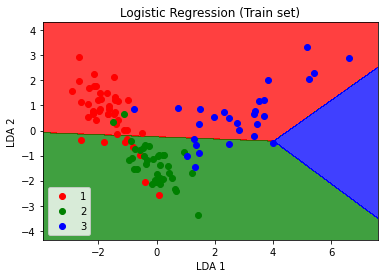

In [31]:
X_set, Y_set = X_train_lda, Y_train_lda
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01), np.arange(start=X_set[:,1].min() -1, stop = X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier_lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap= ListedColormap(('red','green','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title("Logistic Regression (Train set)")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.legend()
plt.show()

For this .csv file better model is LDA (for both: test and train).

In [32]:
%%shell
jupyter nbconvert --to html ///content/PCA_LDA_ToxinbaseClass.ipynb

[NbConvertApp] WARNING | pattern '///content/PCA_LDA_ToxinbaseClass.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_y

CalledProcessError: ignored